In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/AIML/plant_breed')

In [0]:
from zipfile import ZipFile
with ZipFile('train.zip', 'r') as z:
  z.extractall()

In [0]:
from zipfile import ZipFile
with ZipFile('test.zip', 'r') as z:
  z.extractall()

In [6]:
!ls train

 Black-grass	    'Common wheat'	'Scentless Mayweed'
 Charlock	    'Fat Hen'		'Shepherds Purse'
 Cleavers	    'Loose Silky-bent'	'Small-flowered Cranesbill'
'Common Chickweed'   Maize		'Sugar beet'


In [0]:


import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns

#save the path into variable to use it easily next times.

In [0]:


TRAin_DATA_FOLDER= "train"

In [9]:
images = []
classes=[]
missing=0
i=0
j=0
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    i+=1
    print(i)
    print (class_folder_name)
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    i+=1
    
    class_label = class_folder_name
    
    for image_path in glob(os.path.join(class_folder_path, "*.png")):
        j+=1
        print(j)
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        print (image_path)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)

1
Fat Hen
1
train/Fat Hen/a7547b978.png
2
train/Fat Hen/038850f48.png
3
train/Fat Hen/2f80532a2.png
4
train/Fat Hen/786319e1b.png
5
train/Fat Hen/ec7cde707.png
6
train/Fat Hen/e74f35d5d.png
7
train/Fat Hen/1012b652c.png
8
train/Fat Hen/fbd8e91d3.png
9
train/Fat Hen/190b948d5.png
10
train/Fat Hen/5f1fd3c70.png
11
train/Fat Hen/e1783ecc3.png
12
train/Fat Hen/149dbba5f.png
13
train/Fat Hen/5aae43c81.png
14
train/Fat Hen/c354695d7.png
15
train/Fat Hen/0a4ab470e.png
16
train/Fat Hen/c1350e0ae.png
17
train/Fat Hen/2cab73c25.png
18
train/Fat Hen/e6b756e98.png
19
train/Fat Hen/3ac434ccd.png
20
train/Fat Hen/b8e3dd9ae.png
21
train/Fat Hen/cc40c32ed.png
22
train/Fat Hen/8689b3765.png
23
train/Fat Hen/56d88c09d.png
24
train/Fat Hen/c4b7cf7f5.png
25
train/Fat Hen/6b175ade7.png
26
train/Fat Hen/a86b9c0cd.png
27
train/Fat Hen/f3f6559bf.png
28
train/Fat Hen/7e98e4aa6.png
29
train/Fat Hen/946b48f62.png
30
train/Fat Hen/075cb6666.png
31
train/Fat Hen/4d7fd4020.png
32
train/Fat Hen/b43d0a350.png
33
trai

In [0]:
x_test=[]
os.chdir('/content/drive/My Drive/AIML/plant_breed/test')
import cv2
for i in os.listdir():
    dummy = cv2.imread(i)
    dummy = cv2.resize(dummy,(256,256))
    x_test.append(dummy)

In [11]:
#number of images in train
len(images)

4748

In [0]:
#resizing the image function
def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

In [0]:

#save resized images into images.
images = [resize_images(img) for img in images]

In [14]:

images[0].shape

(256, 256, 3)

#number of images in each class

In [15]:



#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

images shape:  (4748, 256, 256, 3)
classes shape:  (4748,)
number of Small-flowered Cranesbill images is  -> 496
number of Cleavers images is  -> 287
number of Shepherds Purse images is  -> 231
number of Common Chickweed images is  -> 611
number of Common wheat images is  -> 221
number of Fat Hen images is  -> 473
number of Loose Silky-bent images is  -> 654
number of Scentless Mayweed images is  -> 516
number of Black-grass images is  -> 263
number of Charlock images is  -> 390
number of Maize images is  -> 221
number of Sugar beet images is  -> 385


#distrbution of number of images

Text(0.5, 0.98, 'Categorical Plotting')

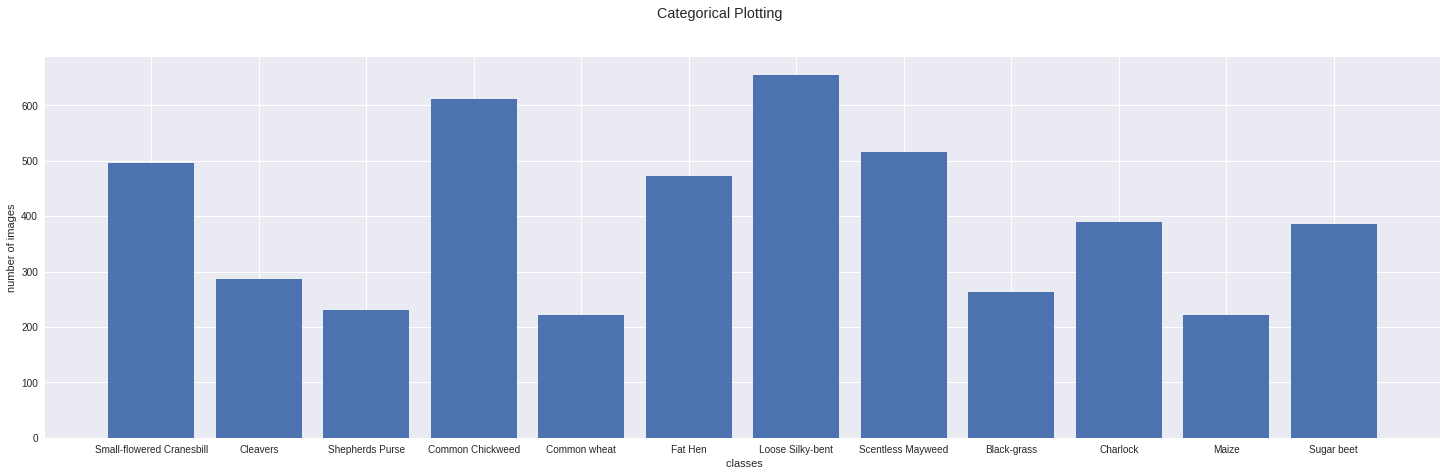

In [16]:

values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(25,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

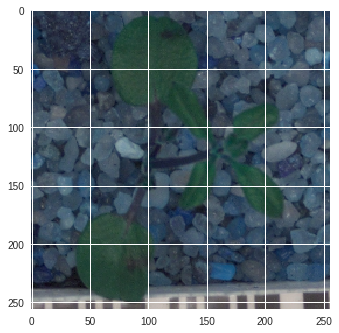

In [17]:
#image after resize

plt.imshow(images[1000])


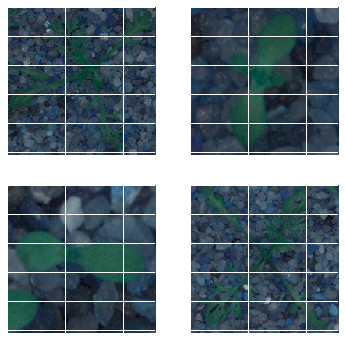

In [18]:
def plot_for_class(label):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))
    class_images =images[classes== label]
    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(class_images[n])
            n += 1 
plot_for_class("Scentless Mayweed")

In [19]:
#encoding labels
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)
y[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

#splitting data into training, testing  and validation   70% training and 30% validation

In [0]:


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=50)





#splitting into training and validation

In [0]:
random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)

In [21]:
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, GlobalMaxPooling2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Set the CNN model 

batch_size = None

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', batch_input_shape = (batch_size,256, 256, 3)))


model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.4))



model.add(GlobalMaxPooling2D())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(12, activation = "softmax"))
model.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 256, 256, 32)      25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 128, 128, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_4 (Conv2D)    

In [0]:
opt = Adam(lr=0.001)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [23]:
 

model.fit(X_train, y_train, epochs = 50, validation_data = (X_val,Y_val),batch_size = batch_size)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 3323 samples, validate on 713 samples
Epoch 1/50
3323/3323 [==============================] - 57s 17ms/step - loss: 14.8296 - acc: 0.0794 - val_loss: 14.9652 - val_acc: 0.0715
Epoch 2/50
3323/3323 [==============================] - 46s 14ms/step - loss: 14.8230 - acc: 0.0803 - val_loss: 14.9652 - val_acc: 0.0715
Epoch 3/50
3323/3323 [==============================] - 46s 14ms/step - loss: 14.7774 - acc: 0.0828 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 4/50
3323/3323 [==============================] - 46s 14ms/step - loss: 14.7344 - acc: 0.0858 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 5/50
3323/3323 [==============================] - 46s 14ms/step - loss: 14.7805 - acc: 0.0828 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 6/50
3323/3323 [==============================] - 46s 14ms/step - loss: 14.7595 - acc: 0.0843 - val_loss: 14.9878 - val_acc: 0.0701

In [24]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = 38)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 14.963568491882153
Test accuracy: 0.07162921367150345


In [0]:
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
epochs = 30
batch_size = 38

In [0]:
# With data augmentation 

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [27]:

X_train, X_test, y_train, y_test
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
                              , callbacks=[learning_rate_reduction])

Epoch 1/30
 - 67s - loss: 14.6750 - acc: 0.0895 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 2/30
 - 63s - loss: 14.7350 - acc: 0.0858 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 3/30
 - 62s - loss: 14.7361 - acc: 0.0857 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 4/30
 - 63s - loss: 14.7723 - acc: 0.0833 - val_loss: 14.9652 - val_acc: 0.0715
Epoch 5/30
 - 62s - loss: 14.7665 - acc: 0.0838 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 6/30
 - 62s - loss: 14.7605 - acc: 0.0842 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 7/30
 - 63s - loss: 14.7724 - acc: 0.0835 - val_loss: 14.9878 - val_acc: 0.0701

Epoch 00007: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 8/30
 - 62s - loss: 14.6901 - acc: 0.0885 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 9/30
 - 62s - loss: 14.8006 - acc: 0.0817 - val_loss: 14.9878 - val_acc: 0.0701
Epoch 10/30
 - 62s - loss: 14.6164 - acc: 0.0932 - val_loss: 14.9878 - val_acc: 0.0701

Epoch 00010: ReduceLROnPlateau reducing learning rate to 

In [28]:
score = model.evaluate(X_test, y_test, verbose=0, batch_size = None)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 14.601364382197348
Test accuracy: 0.09410112359550561


#training and validation loss and accuracy

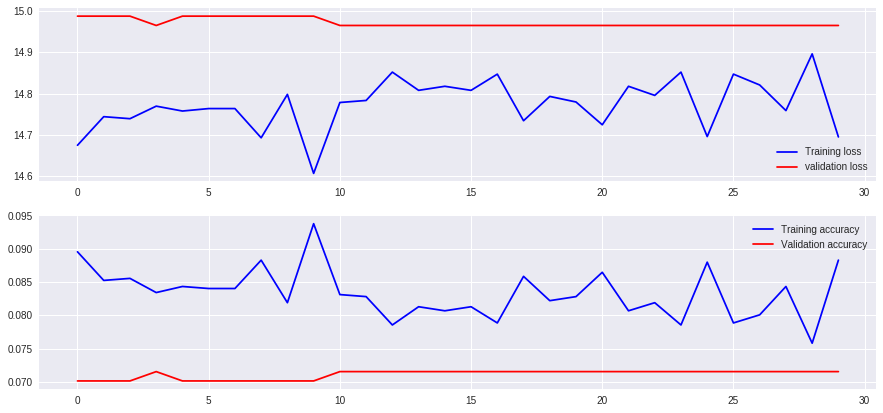

In [30]:

fig, ax = plt.subplots(2,1 , figsize=(15,7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)